In [1]:
import pandas as pd
import lifelines as ll
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TENURES = pd.read_csv('categorized/tenures-summarized-categorized.csv')

In [3]:
TENURES.head()

,slug,coach,coach_id,franchise,seasons,games,wins,losses,min_date,max_date,left_truncated,ending
0,krugelo99c|00|02|ATL,Lon Kruger,krugelo99c,ATL,3,191,69,122,2000-10-31,2002-12-23,True,fired
1,stottte99c|02|04|ATL,Terry Stotts,stottte99c,ATL,2,137,52,85,2002-12-27,2004-04-14,False,fired
2,woodsmi01c|04|10|ATL,Mike Woodson,woodsmi01c,ATL,6,492,206,286,2004-11-03,2010-04-14,False,fired
3,drewla01c|10|13|ATL,Larry Drew,drewla01c,ATL,3,230,128,102,2010-10-27,2013-04-17,False,fired
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,ATL,5,356,195,161,2013-10-30,2017-12-14,False,NaN


In [4]:
TENURES.ending.value_counts()

fired               114
interim only         39
resigned             26
contract expired      2
traded                2
retired               2
mutual                2
died                  1
Name: ending, dtype: int64

In [5]:
tenures = TENURES[TENURES.ending != 'interim only']

In [6]:
death_event = ['fired', 'contract expired', 'mutual']

In [7]:
tenures['death'] = (tenures.ending.isin(death_event) * 1)

/home/ryan/.virtualenvs/coaching-survival/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
tenures.sample(5)

,slug,coach,coach_id,franchise,seasons,games,wins,losses,min_date,max_date,left_truncated,ending,death
195,trianja99c|08|11|TOR,Jay Triano,trianja99c,TOR,3,229,87,142,2008-12-05,2011-04-13,False,contract expired,1
16,floydti99c|00|01|CHI,Tim Floyd,floydti99c,CHI,2,107,19,88,2000-10-31,2001-12-22,True,resigned,0
184,popovgr99c|00|17|SAS,Gregg Popovich,popovgr99c,SAS,18,1406,1006,400,2000-10-31,2017-12-12,True,NaN,0
91,rileypa01c|00|03|MIA,Pat Riley,rileypa01c,MIA,3,246,111,135,2000-11-01,2003-04-15,True,resigned,0
180,malonmi99c|13|14|SAC,Mike Malone,malonmi99c,SAC,2,106,39,67,2013-10-30,2014-12-13,False,fired,1


In [9]:
kmf = ll.KaplanMeierFitter()

In [10]:
kmf.fit(tenures.games, event_observed=tenures.death)

<lifelines.KaplanMeierFitter: fitted with 179 observations, 61 censored>

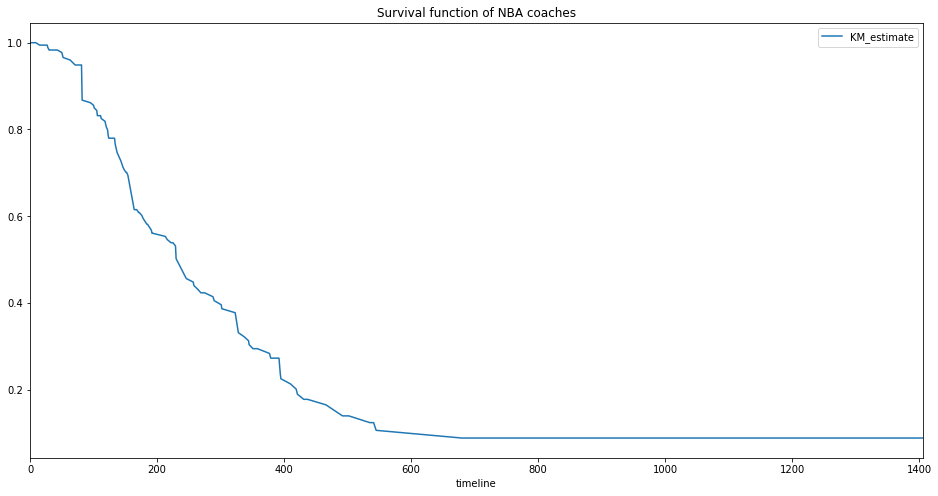

In [11]:
kmf.survival_function_.plot(figsize=(16,8))
plt.title('Survival function of NBA coaches');

Text(0.5,1,u'Survival function of NBA coaches')

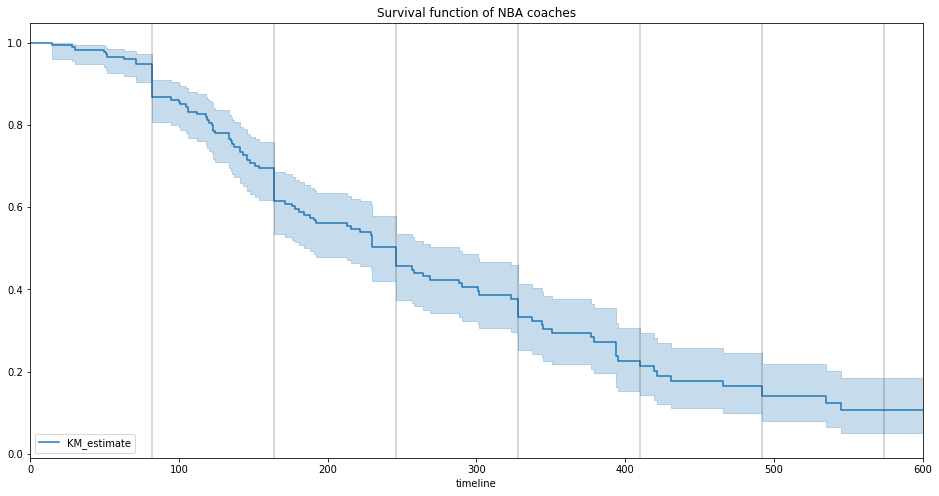

In [12]:
kmf.plot(figsize=(16,8))
[plt.axvline(g, c='black', alpha=0.2) for g in range(82, 82*20, 82)]
plt.xlim(0, 600)
plt.title('Survival function of NBA coaches')

In [13]:
POC = pd.read_csv('categorized/coach-list-poc.csv')

In [14]:
POC.head()

,coach,coach_id,franchises,poc,note
0,Tyronn Lue,luety01c,CLE,yes,NaN
1,Tyrone Corbin,corbity01c,SAC|UTA,yes,NaN
2,Tony Brown,brownto01c,NJNBRK,yes,NaN
3,Terry Porter,portete01c,PHO|MIL,yes,NaN
4,Sidney Lowe,lowesi01c,VANMEM,yes,NaN


In [15]:
PLAYERS = pd.read_csv('categorized/coach-list-qualifications.csv')

In [16]:
PLAYERS.head()

,coach,coach_id,franchises,former_nba_player
0,Isiah Thomas,thomais01c,IND|NYK,yes
1,Michael Cooper,coopemi01c,DEN,yes
2,Larry Drew,drewla01c,ATL|MIL,yes
3,Vinny Del Negro,delnevi01c,CHI|LAC,yes
4,Paul Westphal,westppa01c,SAC|SEAOKC,yes


In [17]:
tenures_info = tenures.merge(
    POC[['coach','poc']], 
    how='left'
).merge(
    PLAYERS[['coach','former_nba_player']],
    how='left'
)

In [18]:
tenures_info.poc.isnull().sum()

1

In [19]:
tenures_info.former_nba_player.isnull().sum()

0

In [20]:
tenures_info.groupby(['poc','former_nba_player']).size().unstack('poc')

poc,no,yes
former_nba_player,,
no,49,15
yes,60,54


In [21]:
tenures_info.head()

,slug,coach,coach_id,franchise,seasons,games,wins,losses,min_date,max_date,left_truncated,ending,death,poc,former_nba_player
0,krugelo99c|00|02|ATL,Lon Kruger,krugelo99c,ATL,3,191,69,122,2000-10-31,2002-12-23,True,fired,1,no,no
1,stottte99c|02|04|ATL,Terry Stotts,stottte99c,ATL,2,137,52,85,2002-12-27,2004-04-14,False,fired,1,no,no
2,woodsmi01c|04|10|ATL,Mike Woodson,woodsmi01c,ATL,6,492,206,286,2004-11-03,2010-04-14,False,fired,1,yes,yes
3,drewla01c|10|13|ATL,Larry Drew,drewla01c,ATL,3,230,128,102,2010-10-27,2013-04-17,False,fired,1,yes,yes
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,ATL,5,356,195,161,2013-10-30,2017-12-14,False,NaN,0,no,no


(0, 600)

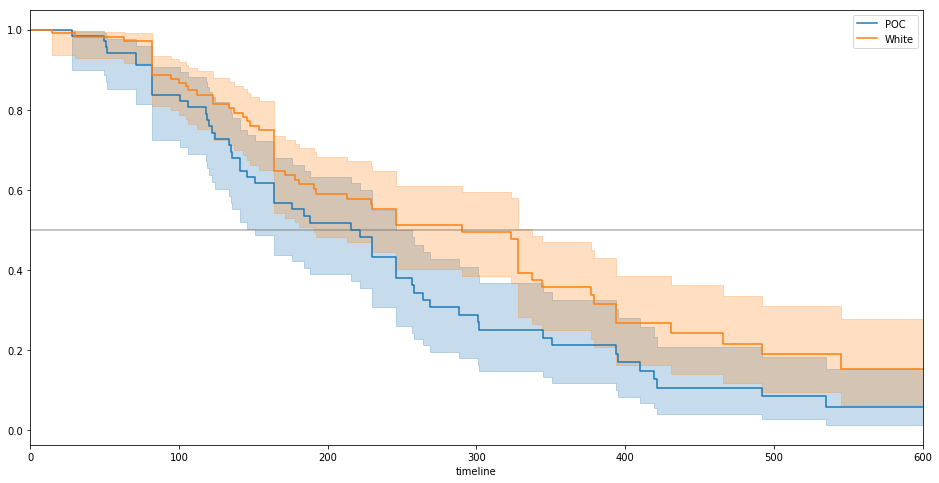

In [22]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

ispoc = (tenures_info['poc'] == 'yes')

kmf.fit(tenures_info[ispoc].games, event_observed=tenures_info[ispoc].death, label="POC")
kmf.plot(ax=ax)
pocmed = kmf.median_
kmf.fit(tenures_info[~ispoc].games, event_observed=tenures_info[~ispoc].death, label="White")
kmf.plot(ax=ax)
whtmed = kmf.median_

plt.axhline(0.5, c='#666666', alpha=0.5)

plt.xlim(0,600)

In [23]:
print "The median survival time for POC coaches was {} games".format(pocmed)
print "The median survival time for white coaches was {} games".format(whtmed)

The median survival time for POC coaches was 222.0 games
The median survival time for white coaches was 290.0 games


(0, 600)

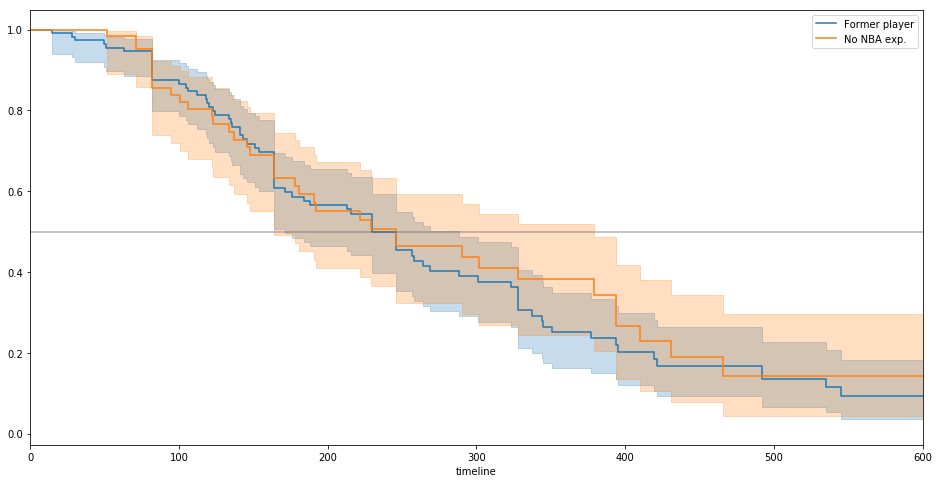

In [24]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

former_player = (tenures_info['former_nba_player'] == 'yes')

kmf.fit(tenures_info[former_player].games, event_observed=tenures_info[former_player].death, label="Former player")
kmf.plot(ax=ax)
nbamed = kmf.median_
kmf.fit(tenures_info[~former_player].games, event_observed=tenures_info[~former_player].death, label="No NBA exp.")
kmf.plot(ax=ax)
nonmed = kmf.median_

plt.axhline(0.5, c='#666666', alpha=0.5)

plt.xlim(0,600)

In [25]:
print "The median survival time for former NBA players was {} games".format(nbamed)
print "The median survival time for non-players was {} games".format(nonmed)

The median survival time for former NBA players was 230.0 games
The median survival time for non-players was 246.0 games


In [26]:
regdata = tenures_info[['games','death','poc','former_nba_player']]
regdata['poc'] = (regdata.poc == "yes") * 1
regdata['former_nba_player'] = (regdata.former_nba_player == "yes") * 1

/home/ryan/.virtualenvs/coaching-survival/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ryan/.virtualenvs/coaching-survival/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 4 columns):
games                179 non-null int64
death                179 non-null int64
poc                  179 non-null int64
former_nba_player    179 non-null int64
dtypes: int64(4)
memory usage: 7.0 KB


In [31]:
cph = ll.CoxPHFitter(alpha=0.95)
cph.fit(
    regdata,
    duration_col='games',
    event_col='death'
)

<lifelines.CoxPHFitter: fitted with 179 observations, 61 censored>

In [32]:
cph.print_summary()

n=179, number of events=118

                    coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95   
poc               0.3842     1.4684    0.1897 2.0255 0.0428      0.0123      0.7561  *
former_nba_player 0.0266     1.0270    0.2025 0.1315 0.8954     -0.3703      0.4236   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.545


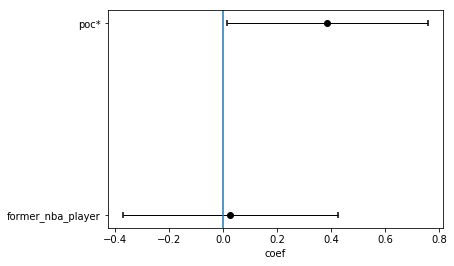

In [33]:
cph.plot()
plt.axvline(0)